<a href="https://colab.research.google.com/github/Rajakumaran-S/Credit_Card_Default_Prediction_Capstone-Project_III/blob/main/Netflix_Movie_and_TV_Shows_Clustering_Raja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title - Netflix Movie and TV Shows Clustering </u></b>

##### **Project Type**    - Unsupervised (Clustering, Content Based Recommendation System)
##### **Contribution** - Individual
##### **Name** - Rajakumaran S
##### **Cohort** - Azaadi (AlmaBetter)
                                  
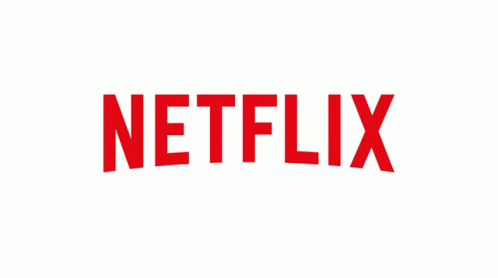




# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In this project, we worked on a text clustering problem where we had to classify/group the Netflix movie/shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

- The dataset contained about 7787 records, and 11 attributes. 

- We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

- Creating cluster using following attributes: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

- We used Principal Component Analysis (PCA) to handle the curse of dimensionality.

- We built Two types of clusters using the K-Means Clustering and Agglomerative Heirachycal clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.

- A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


<b>Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.

<b>We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

<b>The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [43]:
# Improt library for Analyzing and Visualization:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Import library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Import library for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Import library for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Import Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Alma Better/ Netflix_Movie_and_TV_Shows_Clustering/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.csv')

### Dataset First View

In [46]:
# Dataset First Look
# top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [47]:
# last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [48]:
# Dataset Rows & Columns count
print(f'Number of Rows : {df.shape[0]}')
print(f'Number of Columns : {df.shape[1]}')

Number of Rows : 7787
Number of Columns : 12


### Dataset Information

In [49]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [50]:
# Dataset Duplicate Value Count
print('Duplicated Rows in the Dataset: ',df.duplicated().sum())

Duplicated Rows in the Dataset:  0


#### Missing Values/Null Values

In [51]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

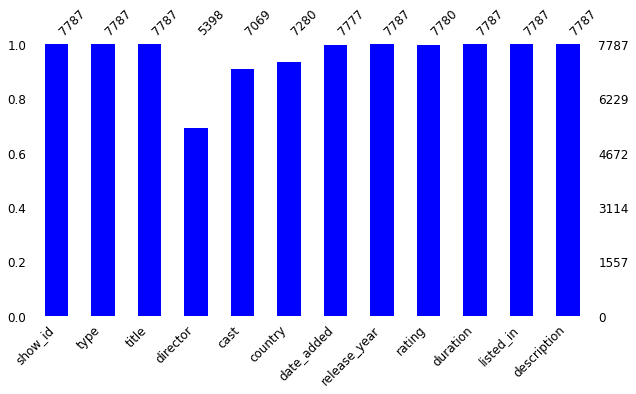

In [52]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, color='blue',figsize=(10,5), fontsize=12)

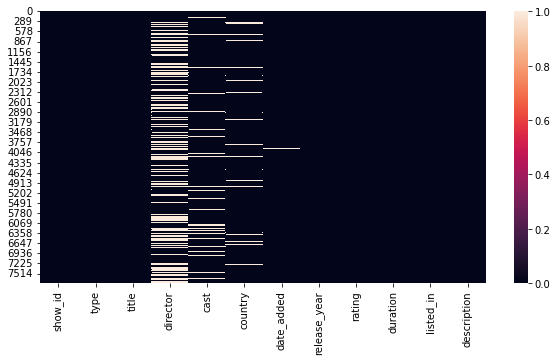

In [53]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isna())

In [54]:
# Missing Values Percentage
round(df.isna().sum()/len(df)*100, 2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

### What did you know about your dataset?

*   This dataset has 7787 rows and 12 columns.
*   Dataset is free from duplicate values.

*   Director column has maximum percentage of null values almost 30.68%, followed by cast, country, date_added and rating columns with 9.2%, 6.5%, 0.13% and 0.09% of null values respectively.
*   All columns have data of object type except release_year which is integer type, which means we have only one numerical column in the dataset.

## ***2. Understanding Your Variables***

In [55]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [56]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 


| Field | Description |
|-------|-------------|
|Show_id|Unique id for every movie/TV show|
|Release_year|Actual release year of the movie/TV show|
|Type|Identifier - movie/TV show|
|Rating|TV rating of the show|
|Title|Title of the movie/TV show|
|Duration|Total duration in minutes or number of seasons|
|Director|Director of the movie/TV show|
|Listed_in|Genre of the movie/TV show|
|Cast|Actors involved in the movie/TV show|
|Description|Summary description|
|Country|Country of production|
|Date_added|Date it was added on netflix|**

### Check Unique Values for each variable.

In [57]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'number of unique values in {i} column : {df[i].nunique()}    \nunique values :\n{df[i].unique()}')
  print('='*150)

number of unique values in show_id column : 7787    
unique values :
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
number of unique values in type column : 2    
unique values :
['TV Show' 'Movie']
number of unique values in title column : 7787    
unique values :
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
number of unique values in director column : 4049    
unique values :
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
number of unique values in cast column : 6831    
unique values :
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sa

## 3. ***Data Wrangling***

### Data Wrangling Code

In [58]:
# Write your code to make your dataset analysis ready.

# Create new features to store date, day, month and year seperately :
# First convert date_added to date time format.
df["date_added"] = pd.to_datetime(df['date_added'])
# Compute day. 
df['day_added'] = df['date_added'].dt.day  
# Compute year.         
df['year_added'] = df['date_added'].dt.year
# Compute mount.
df['month_added'] = df['date_added'].dt.month 

#  Creating two extra columns 
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']
# duration manipulation for movie
movies.duration = movies.duration.str.replace(' min','').astype(int)
# duration manipulation for tv shows
tv_shows.rename(columns={'duration':'seasons'}, inplace=True)
tv_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
tv_shows.seasons = tv_shows.seasons.str.replace(' Seasons','').astype(int)

# Splitting datasets for movies and tv show
df_movies = df[df['type']=='Movie'].copy()
df_shows = df[df['type']=='TV Show'].copy()

# fixing data types in rating column
custom_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['ratings_cat'] = df['rating'].replace(to_replace = custom_rating)
df['ratings_cat'].unique()

df['type'] = pd.Categorical(df['type'])

# ratings_cat is another category (4 classes)
df['ratings_cat'] = pd.Categorical(df['ratings_cat'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# changing dtype to string
df['type']= df['type'].astype('string')
df['title']= df['title'].astype('string')
df['director']= df['director'].astype('string')
df['cast']= df['cast'].astype('string')
df['country']= df['country'].astype('string')
df['rating']= df['rating'].astype('string')
df['listed_in']= df['listed_in'].astype('string')
df['description']= df['description'].astype('string')


### What all manipulations have you done and insights you found?

Answer Here:

*   Date time column was converted into datetime format and information like day, month and year was extracted from it into new columns.
*   Dataset was split into separate datasets with respect to 'type' column i.e., movie and TV shows for better insights.

*   Duration Manipulation: 
      * Movies dataframe: duration is converted into integer
      * TV shows dataframe: 'seasons' word was removed and only integer value was kept as number of seasons.



*   There were several categories in rating column so for better understanding we categorized it into 4 basic categories i.e., kids, older kids, teens and adults. 

*   Suitable columns datatypes were converted from object type to string format to make the data processable.










In [59]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,ratings_cat
0,s1,TV Show,3%,<NA>,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,2020.0,8.0,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,2016.0,12.0,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,2018.0,12.0,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16.0,2017.0,11.0,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.0,2020.0,1.0,Teens


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

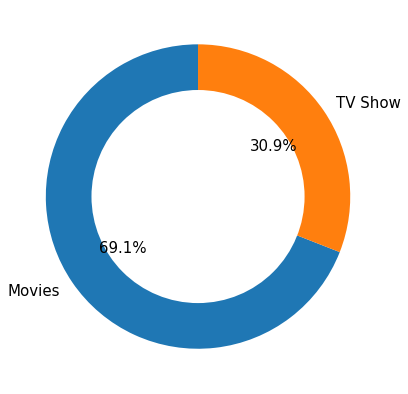

In [60]:
# create a pie chart
fig1, ax1 = plt.subplots(figsize=(8,7))
plt.rcParams.update({'font.size': 15})
ax1.pie(df['type'].value_counts(), labels=['Movies', 'TV Show'], autopct='%1.1f%%', startangle=90)

# draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# show chart
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: Donut chart is a great way to represent share of various attributes in total pool.

##### 2. What is/are the insight(s) found from the chart?

1. Greater number of count belong from movie class than Tv show class.  
2. 69% of data belong from Movie class and 31% of data belong from TV shows 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are less number of TV shows available, therefore we should promote TV shows production to ensure better audience retension due to more duration and story complexity.

#### Chart - 2

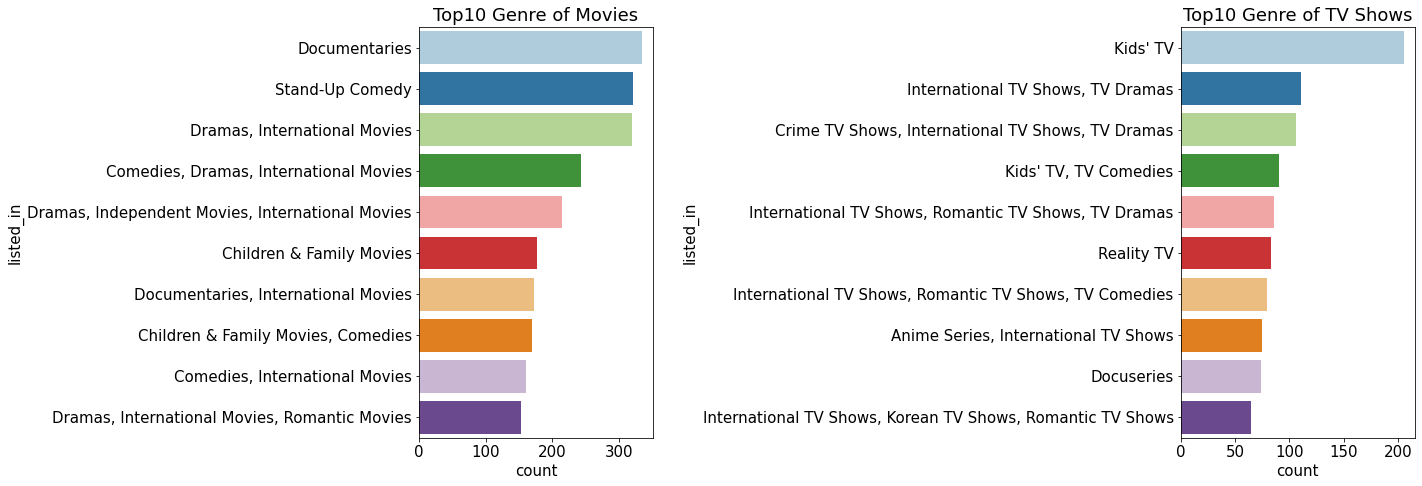

In [61]:
# #Analysing top10 genre of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],  palette='Paired', ax=ax[0])
ax[0].set_title('Top10 Genre of Movies')
# #Analysing top10 genres of TVSHOWS
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10], palette='Paired', ax=ax[1])
ax[1].set_title('Top10 Genre of TV Shows')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here: we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:

*   Documentaries are the top most genre in the netflix movies
*   Kids TV is the top most genre in netflix TV shows.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
According to personal experience and observation comedy movies are more preferred but are less in database, thus it should be promoted to attract wide audience.

#### Chart - 3

Text(0.5, 1.0, 'Top 10 genres')

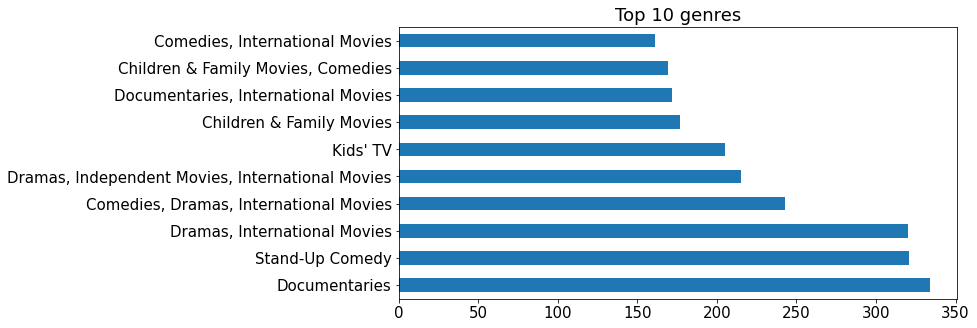

In [62]:
# Top 10 genres 
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [63]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

12.520868113522537

In [64]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

29.7547194041351

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* **The dramas is the most popular genre followed by comedies and documentaries.**
* **These three genres account for about 41% of all movies and TV shows.**
* **This value increases to about 82% for top 10 genres.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

Text(0.5, 0, 'Month -> (Content added to Netflix) ')

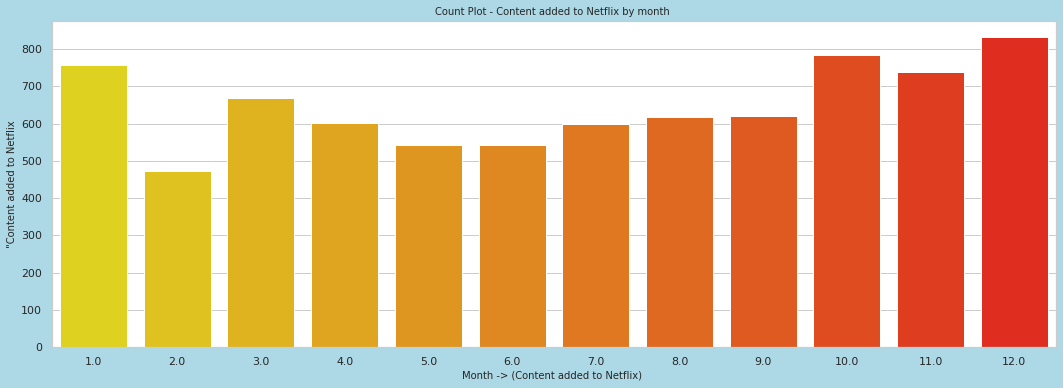

In [65]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data=df,x = 'month_added',palette ="autumn_r")
plt.title('Count Plot - Content added to Netflix by month ', fontsize=10)
plt.ylabel('"Content added to Netflix', fontsize=10)
plt.xlabel('Month -> (Content added to Netflix) ', fontsize=10)
     

##### 1. Why did you pick the specific chart?

Answer Here: we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here: Most of the movies were found to be released in the month of october, november, december and january.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: There is wide gap in new content release in mid year, so this can be filled.

#### Chart - 5

Text(0.5, 0, 'Year -> (Movies added to Netflix) ')

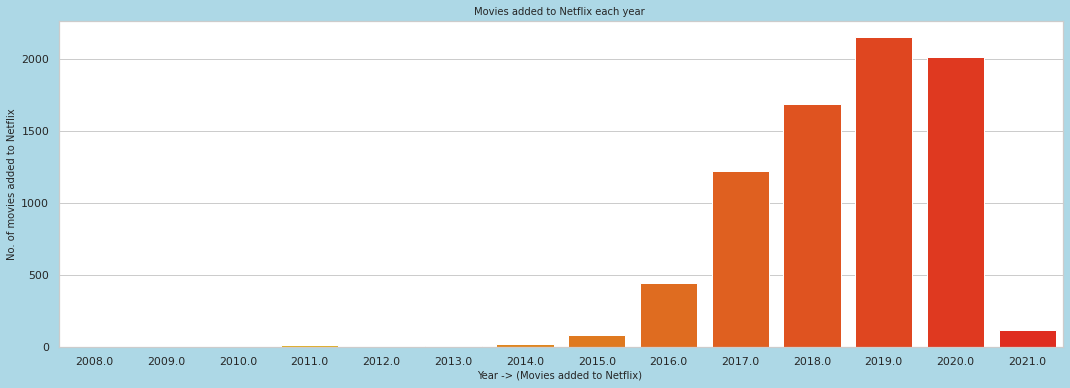

In [66]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data = df,x = 'year_added',palette ="autumn_r")
plt.title('Movies added to Netflix each year ', fontsize=10)
plt.ylabel('No. of movies added to Netflix', fontsize=10)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=10)

##### 1. Why did you pick the specific chart?

Answer Here: we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
* **Netflix continuous to add more shows on its platform over the years.**
* **There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.**
* **We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
Due to covid outbreak large number of audience is inclining towards OTT platforms than physical theatres.

#### Chart - 6

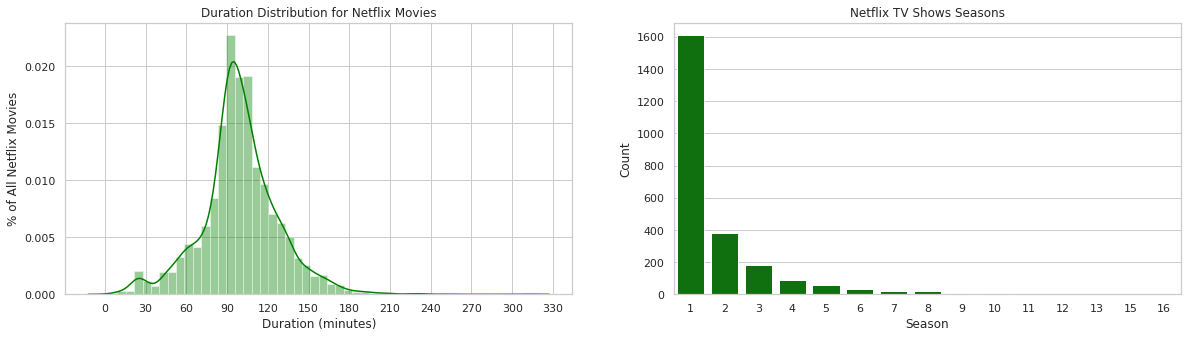

In [67]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.distplot(movies.duration, color='green',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(tv_shows.seasons, color='green',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season")
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here: Histograms have been used to represent distribution of columns having numerical data, histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: 



*   Most of the movies have duration of 90 mins.
*   Most of the TV shows have one season, but this number goes on decreasing with increase in number seasons.


#**Bivariate Analysis**

#### Chart - 7

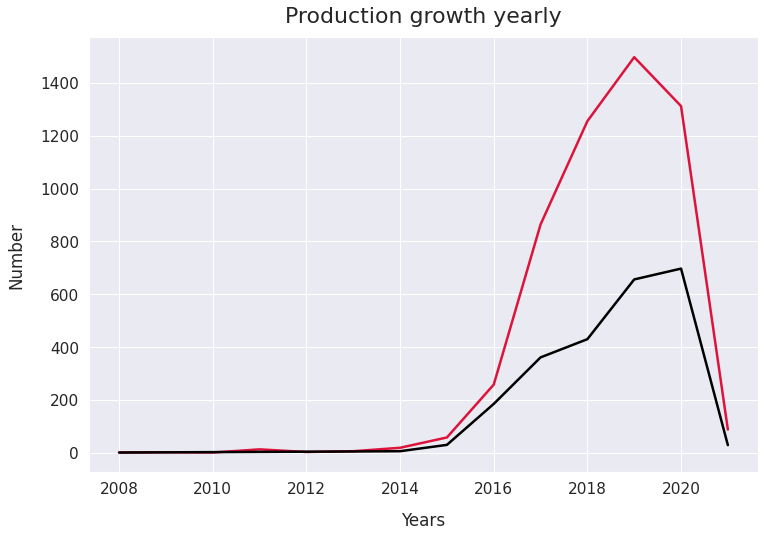

In [68]:
# Chart - 9 visualization code
# visualizing the movies and tv_shows based on the release year
movies_year =movies['year_added'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['year_added'].value_counts().sort_index(ascending=False)
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='crimson',label="Movies per year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='black',label="TV Shows per year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: In the year 2019 more number of movies were released as compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: There are less number of TV shows available, therefore we should promote TV shows production to ensure better audience retention due to more duration and story complexity.

#### Chart - 8

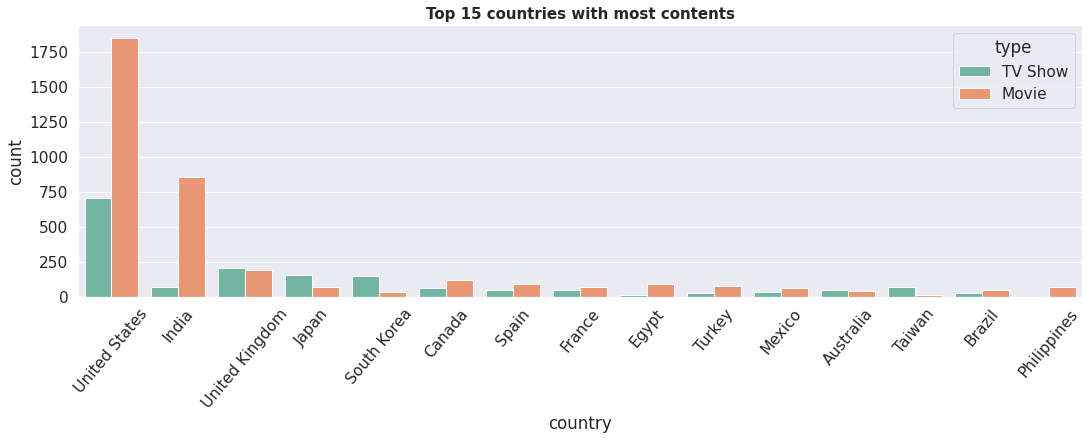

In [70]:
# Chart - 10 visualization code
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'], palette='Set2')
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here: United States has highest number of contents in Netflix followed by India.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: As we can see that very large variety of content is not available for India and severl other countries thus missing variety should be made available for other countries to provide better options for audience and to increase engagement.

#### Chart - 9

#### Chart - 13

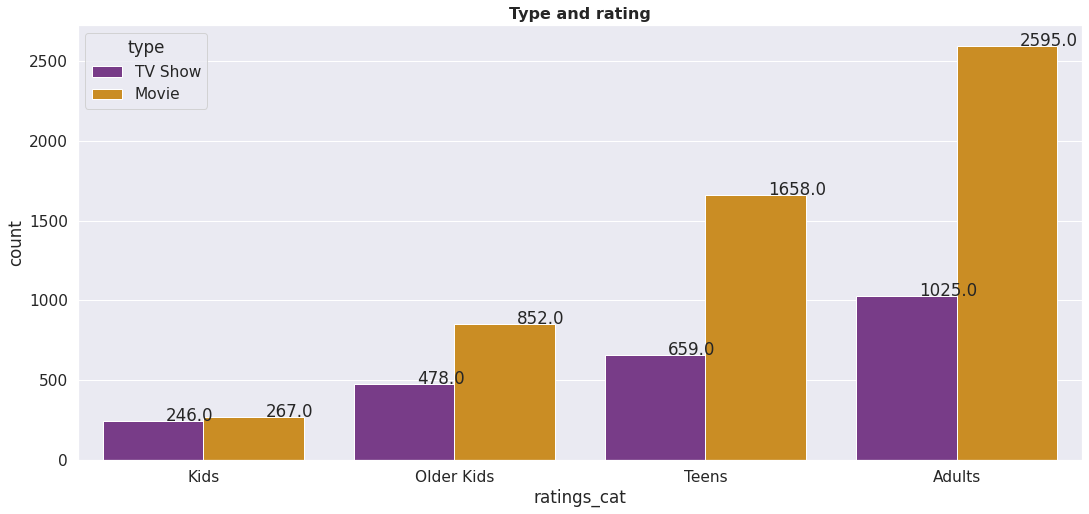

In [71]:
# Chart - 13 visualization code
# Rating
plt.figure(figsize=(18,8))
ax=sns.countplot(x='ratings_cat',hue='type', data=df,palette="CMRmap")
plt.title('Type and rating',size='16',fontweight="bold")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis. 

##### 2. What is/are the insight(s) found from the chart?

Netflix has more content in the adult section followed by teen section.

#**Multivariate Analysis**

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***